# Hello World Agent

Out first graph!

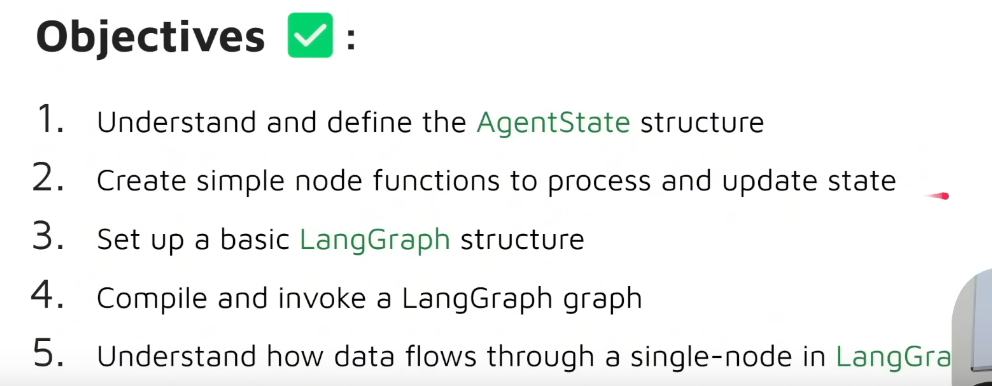

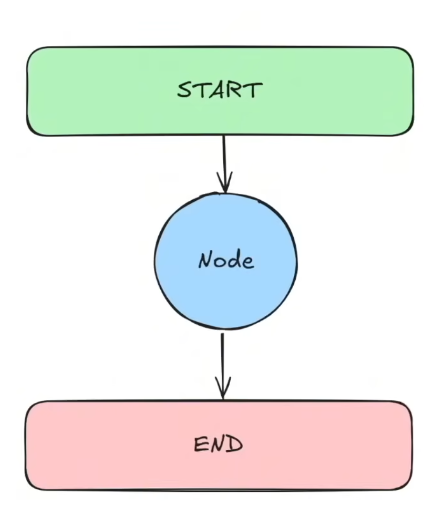

In [7]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph 

Lets define a node - nodes are just standart python functions

* Input and Output type of a node needs to be the State

In [ ]:
# we now create an Agent State - shred data structure that keeps track of information as your application runs

class AgentState(TypedDict): # Our state schema
    message: str

def greeting_node(state: AgentState) -> AgentState:
    # doc strings are important in laggraph
    # doc strings tell your AI agent what a function actually does
    """ Simple node that adds a greeting message to the state """
    state["message"] = "Hey " + state["message"] + ", how is your day going?"

    return state # return the updated state



When you add a node to the graph, you specify 2 parameters:
1. The name of the node - which can be anything
2. and what that node does (function)

There are 2 ways to connect our node to START and END point
- Using set_entry_point() or add_edge()

In [10]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

### Visualize the code:

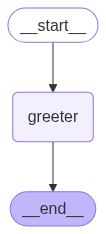

In [11]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
result = app.invoke({"message": "Bob"})

In [13]:
result["message"]

'Hey Bob, how is your day going?'